In [1]:
# computador do IFAM
path_local = 'D:/Salve_Aqui_Seus_Arquivos/DIOGO/'

In [ ]:
# computador de casa
path_local = 'C:/Users/josed/TADS-IFAM/'

In [2]:
path_img = path_local + 'TADS42/TETI/imagens/'

In [3]:
path_db = path_local + 'TADS42/TETI/databases_csv/'

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
%matplotlib inline

In [5]:
from pylab import *

In [6]:
im1 = array(Image.open(path_img + 'objetos.jpg'))

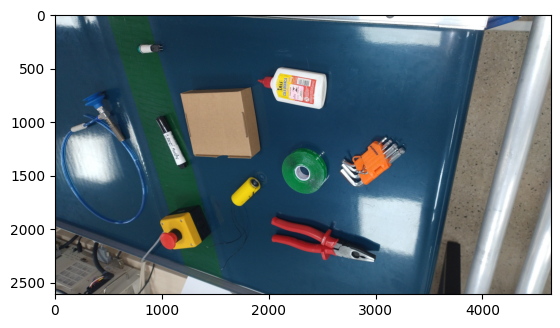

In [7]:
imshow(im1)

In [8]:
rotulo1 = im1[540:850, 2050:2450]

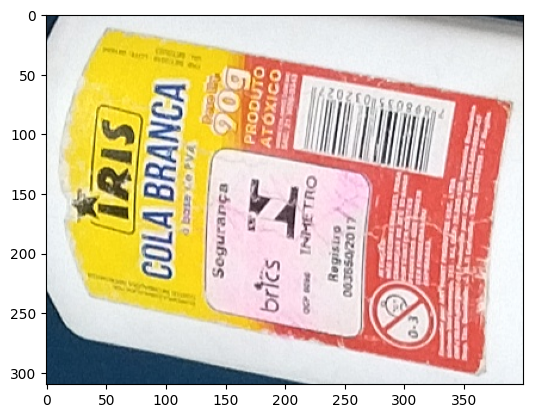

In [9]:
imshow(rotulo1)

In [10]:
rotulo2 = im1[1200:1330, 2930:3040]

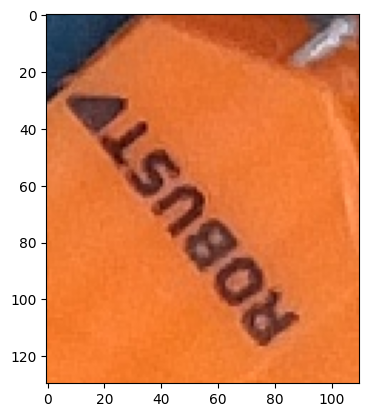

In [11]:
imshow(rotulo2)

In [12]:
np.save('rotulo1', rotulo1)
np.save('rotulo2', rotulo2)

In [13]:
rotulo1_saved = np.load('rotulo1.npy')

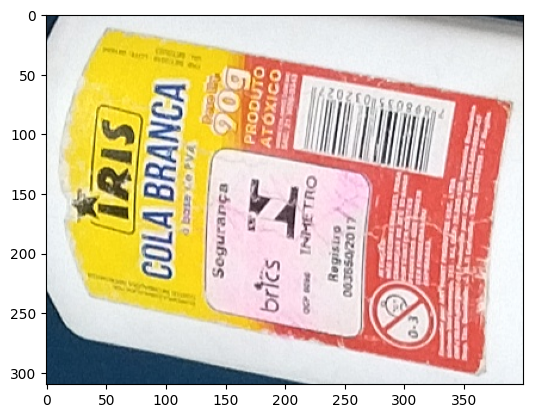

In [14]:
imshow(rotulo1_saved)

In [15]:
rotulo2_saved = np.load('rotulo2.npy')

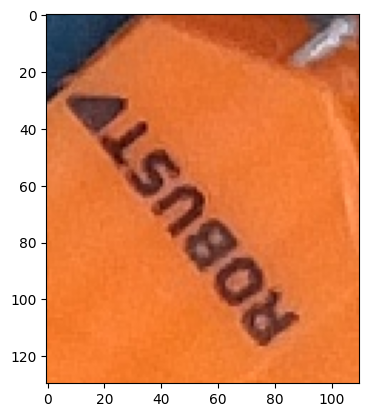

In [16]:
imshow(rotulo2_saved)

In [17]:
def rotacionar_imagem_90graus(imagem):
    # Obter o número de linhas (m) e colunas (n)
    m = len(imagem)      # Número de linhas
    n = len(imagem[0])   # Número de colunas
    
    # Criar uma nova matriz (imagem) com dimensões n x m (invertendo as dimensões)
    imagem_rotacionada = [[0] * m for _ in range(n)]
    
    # Preencher a nova matriz com os valores da matriz original, rotacionados em 90º
    for i in range(m):
        for j in range(n):
            imagem_rotacionada[j][m - 1 - i] = imagem[i][j]
    
    return imagem_rotacionada

In [18]:
imagem_rotacionada = rotacionar_imagem_90graus(rotulo2)

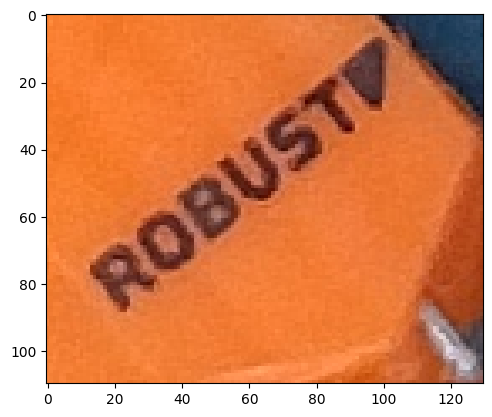

In [19]:
imshow(imagem_rotacionada)

In [20]:
rotulo1 = rotacionar_imagem_90graus(rotulo1)

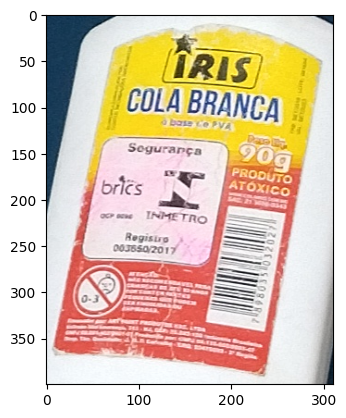

In [21]:
imshow(rotulo1)

In [22]:
rotulo2 = rotacionar_imagem_90graus(rotulo2)

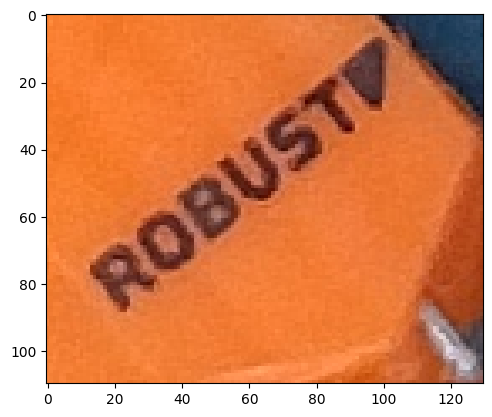

In [23]:
imshow(rotulo2)

In [24]:
def cortarImagem(imagem, x_ini, x_fim, y_ini, y_fim):
    img_cortada = imagem[x_ini:x_fim , y_ini:y_fim]
    return img_cortada

In [25]:
img_cut1 = cortarImagem(im1, 540, 850, 2050, 2450)

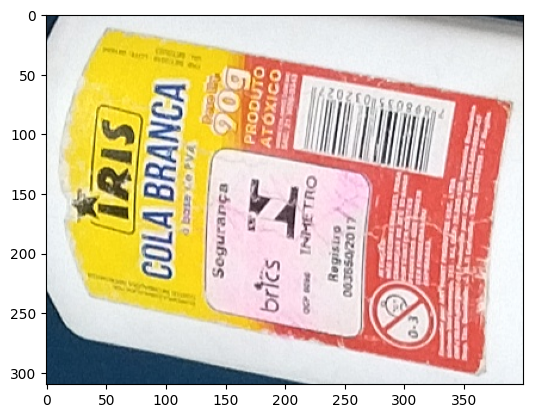

In [26]:
imshow(img_cut1)

In [27]:
def plot_2img (im1, tit1, im2, tit2, tam):
    figure(figsize = tam)
    plt.subplot(1, 2, 1), plt.imshow(im1), plt.title(tit1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(1, 2, 2), plt.imshow(im2), plt.title(tit2)
    plt.xticks([]), plt.yticks([])
    plt.show()

In [28]:
def plot_3img (im1, tit1, im2, tit2, im3, tit3, tam):
    figure(figsize = tam)
    plt.subplot(1, 3, 1), plt.imshow(im1), plt.title(tit1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(1, 3, 2), plt.imshow(im2), plt.title(tit2)
    plt.xticks([]), plt.yticks([])
    plt.subplot(1, 3, 3), plt.imshow(im3), plt.title(tit3)
    plt.xticks([]), plt.yticks([])
    plt.show()

In [29]:
def plot_4img (im1, tit1, im2, tit2, im3, tit3, im4, tit4, tam):
    figure(figsize = tam)
    plt.subplot(1, 4, 1), plt.imshow(im1), plt.title(tit1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(1, 4, 2), plt.imshow(im2), plt.title(tit2)
    plt.xticks([]), plt.yticks([])
    plt.subplot(1, 4, 3), plt.imshow(im3), plt.title(tit3)
    plt.xticks([]), plt.yticks([])
    plt.subplot(1, 4, 4), plt.imshow(im4), plt.title(tit4)
    plt.xticks([]), plt.yticks([])
    plt.show()

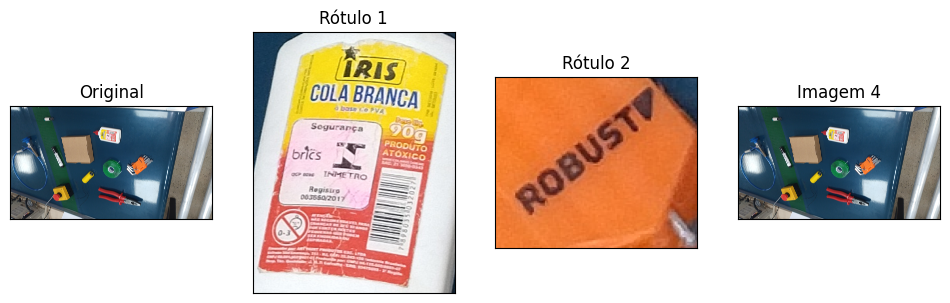

In [30]:
plot_4img(im1, 'Original', rotulo1, 'Rótulo 1', rotulo2, 'Rótulo 2', im1, 'Imagem 4', (12,10))

In [31]:
im2 = array(Image.open(path_img + 'cheetah.jpg'))

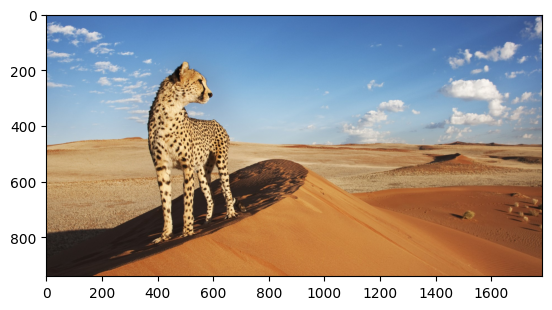

In [32]:
imshow(im2)

In [33]:
im2_r = im2[:,:,0]
im2_g = im2[:,:,1]
im2_b = im2[:,:,2]

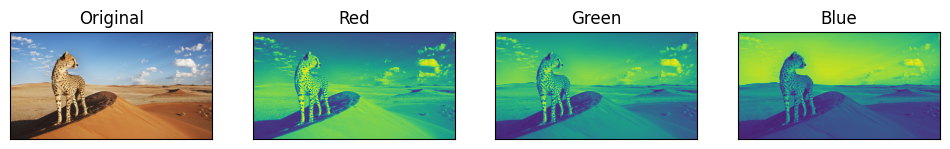

In [34]:
plot_4img(im2, 'Original', im2_r, 'Red', im2_g, 'Green', im2_b, 'Blue', (12,10))

In [35]:
import cv2

In [36]:
im1_cv = cv2.imread(path_img + 'cheetah.jpg')

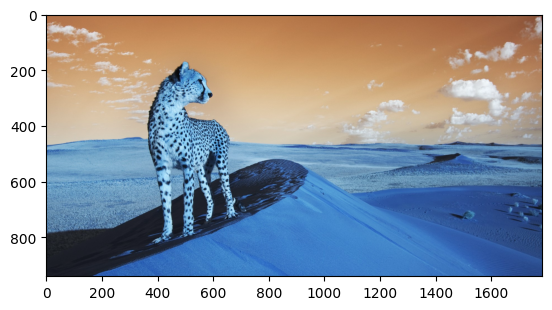

In [37]:
imshow(im1_cv)

In [38]:
im1_cv_rgb = cv2.cvtColor(im1_cv, cv2.COLOR_BGR2RGB)

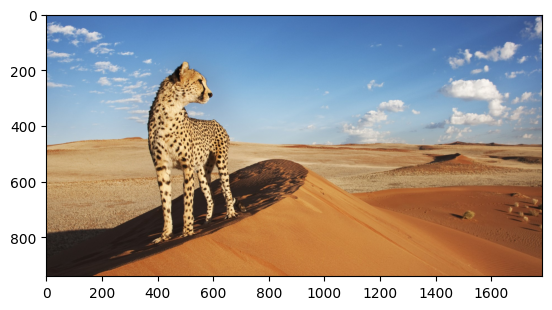

In [39]:
imshow(im1_cv_rgb)

In [40]:
im2_cv = cv2.imread(path_img + 'cheetah.jpg')

In [49]:
im_cv_rgb = cv2.cvtColor(im2_cv, cv2.COLOR_BGR2RGB)

In [42]:
im_cv_hsv = cv2.cvtColor(im2_cv, cv2.COLOR_BGR2HSV)

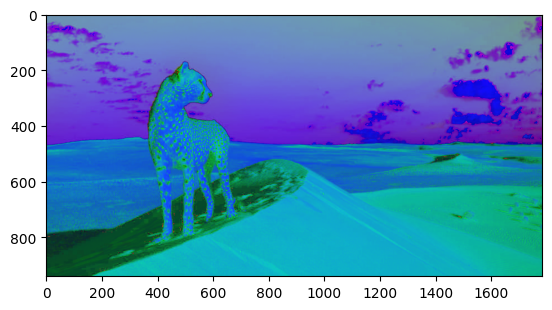

In [43]:
imshow(im_cv_hsv)

In [44]:
im1_h, im1_s, im1_v = cv2.split(im_cv_hsv)

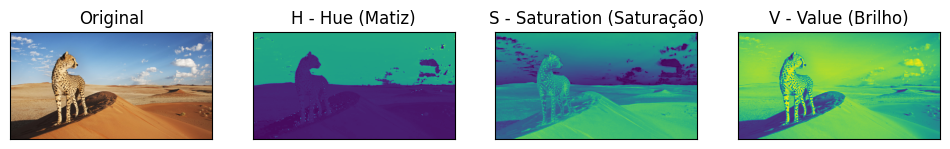

In [45]:
plot_4img(im_cv_rgb, 'Original', im1_h, 'H - Hue (Matiz)', im1_s, 'S - Saturation (Saturação)', im1_v, 'V - Value (Brilho)', (12,10))

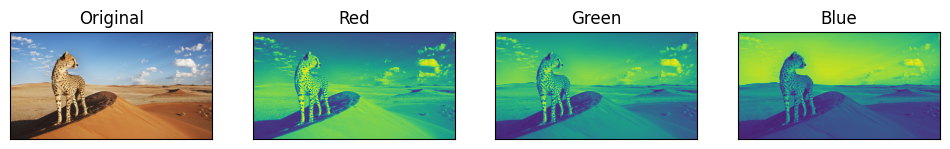

In [46]:
plot_4img(im2, 'Original', im2_r, 'Red', im2_g, 'Green', im2_b, 'Blue', (12,10))

In [75]:
def filtra_cor(img, cor, limiar = 30):
    cor_alvo_hsv = cv2.cvtColor(np.uint8([[cor]]), cv2.COLOR_BGR2HSV)[0][0]
    lim_inf = np.array([max(0, cor_alvo_hsv[0] - limiar), 50, 50])
    lim_sup = np.array([min(179, cor_alvo_hsv[0] + limiar), 255, 255])
    im_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(im_hsv, lim_inf, lim_sup)
    return mask

In [76]:
img3 = cv2.imread(path_img + 'arara2.jpg')

In [77]:
cor = input('Escolha R, G ou B:')
limiar = int(input('Informe o limiar entre 0 e 100:'))
if cor == 'R' or cor == 'r':
    alvo = (0, 0, 255)
elif cor == 'G' or cor == 'g':
    alvo = (0, 255, 0)
elif cor == 'B' or cor == 'b':
    alvo = (255, 0, 0)
else:
    print('Cor Inválida!')

filtro = filtra_cor(img3, alvo, limiar)
resultado = cv2.bitwise_and(img3, img3, mask = filtro)
cv2.imshow('Original', img3)
cv2.imshow('Cor filtro', resultado)
cv2.waitKey(0)
cv2.destroyAllWindows()

Escolha R, G ou B: b
Informe o limiar entre 0 e 100: 50


In [82]:
im = cv2.imread(path_img + 'arara2.jpg')
im_hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
lim_inf = np.array([130,50,0])
lim_sup = np.array([179,255,255])
mask = cv2.inRange(im_hsv, lim_inf, lim_sup)

In [83]:
resultado = cv2.bitwise_and(im, im, mask = mask)
cv2.imshow('Cor detectada', np.hstack((im, resultado)))
cv2.waitKey(0)
cv2.destroyAllWindows()